<a href="https://colab.research.google.com/github/Elbina-Paudel/Breast-Cancer-Classification-using-Deep-Learning/blob/main/Breast_Cancer_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn torch seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv')

In [4]:
# Drop unnecessary column
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [5]:
# Encode diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [6]:
# Handle missing values
df.dropna(inplace=True)

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

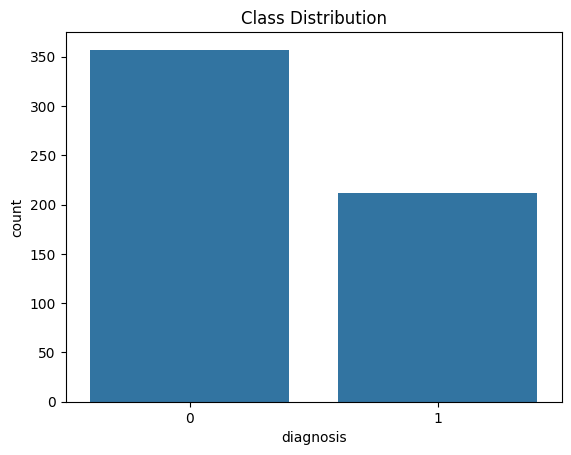

In [7]:
print(df.describe())
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.show()

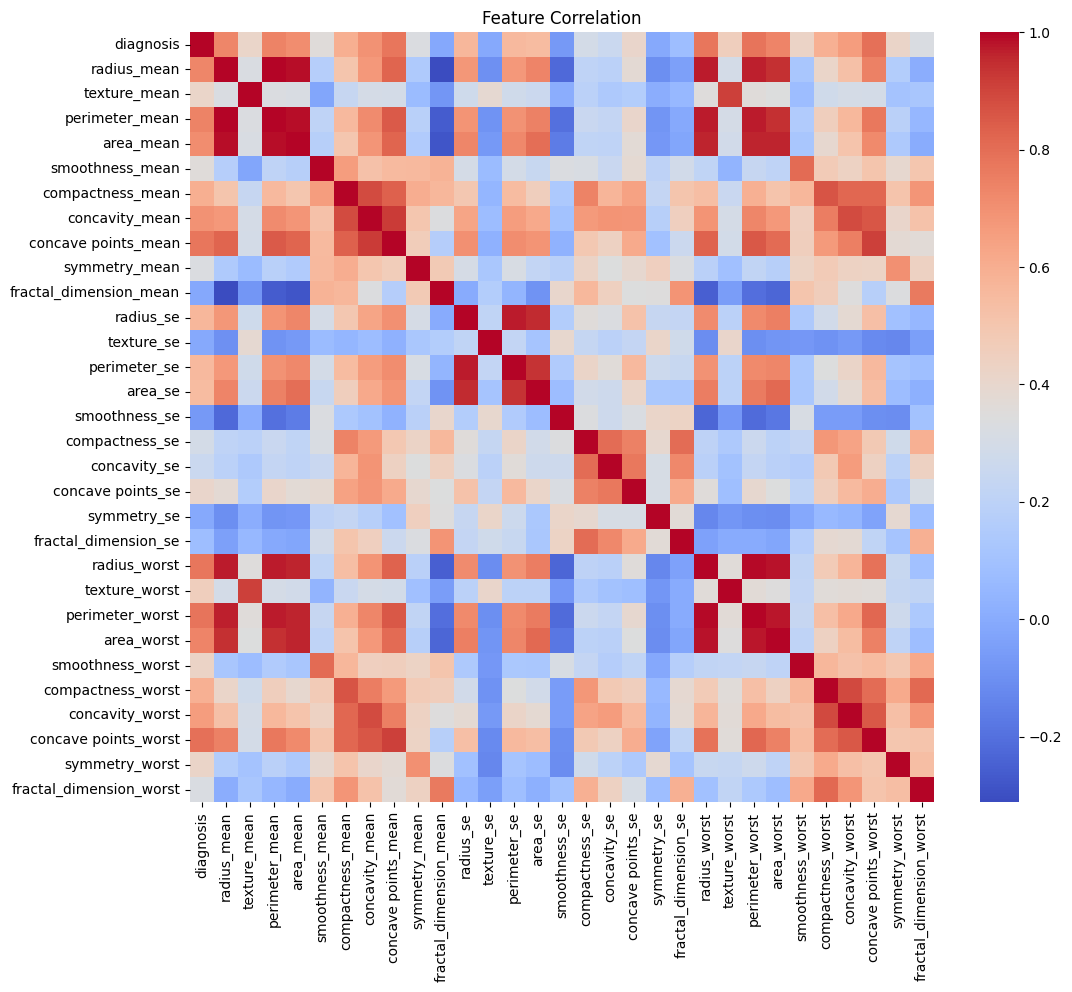

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [9]:
# Features & target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [10]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [12]:
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = BreastCancerDataset(X_train, y_train)
val_dataset = BreastCancerDataset(X_val, y_val)
test_dataset = BreastCancerDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [13]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [14]:
#Training and Evaluation Functions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).view(-1, 1)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device).view(-1, 1)
                val_outputs = model(X_val)
                val_loss += criterion(val_outputs, y_val).item()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")


In [15]:
#Initialize and Train Model
model = MLP(input_dim=X.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50)


Epoch 1/50, Train Loss: 0.6555, Val Loss: 0.5759
Epoch 2/50, Train Loss: 0.5223, Val Loss: 0.4339
Epoch 3/50, Train Loss: 0.3684, Val Loss: 0.2905
Epoch 4/50, Train Loss: 0.2518, Val Loss: 0.1921
Epoch 5/50, Train Loss: 0.1905, Val Loss: 0.1382
Epoch 6/50, Train Loss: 0.1354, Val Loss: 0.1114
Epoch 7/50, Train Loss: 0.1088, Val Loss: 0.0970
Epoch 8/50, Train Loss: 0.0926, Val Loss: 0.0882
Epoch 9/50, Train Loss: 0.0863, Val Loss: 0.0818
Epoch 10/50, Train Loss: 0.0790, Val Loss: 0.0761
Epoch 11/50, Train Loss: 0.0798, Val Loss: 0.0740
Epoch 12/50, Train Loss: 0.0862, Val Loss: 0.0729
Epoch 13/50, Train Loss: 0.0688, Val Loss: 0.0716
Epoch 14/50, Train Loss: 0.0823, Val Loss: 0.0685
Epoch 15/50, Train Loss: 0.0647, Val Loss: 0.0694
Epoch 16/50, Train Loss: 0.0603, Val Loss: 0.0727
Epoch 17/50, Train Loss: 0.0623, Val Loss: 0.0697
Epoch 18/50, Train Loss: 0.0503, Val Loss: 0.0719
Epoch 19/50, Train Loss: 0.0504, Val Loss: 0.0747
Epoch 20/50, Train Loss: 0.0506, Val Loss: 0.0834
Epoch 21/

In [16]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, dataloader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            y_true += y_batch.numpy().tolist()
            y_pred += (outputs.cpu().numpy() > 0.5).astype(int).tolist()

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))

evaluate(model, test_loader)


Accuracy: 0.9883720930232558
Precision: 1.0
Recall: 0.96875
F1 Score: 0.9841269841269841
ROC AUC: 0.984375


In [17]:
#Hyperparameter Tuning
from itertools import product

learning_rates = [0.001, 0.0005]
dropout_rates = [0.3, 0.5]
best_f1 = 0
best_model = None

for lr, dr in product(learning_rates, dropout_rates):
    print(f"\nTesting LR={lr}, Dropout={dr}")

    class TunedMLP(nn.Module):
        def __init__(self, input_dim):
            super(TunedMLP, self).__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(dr),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.model(x)

    model = TunedMLP(X.shape[1]).to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20)

    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            y_true += y_batch.numpy().tolist()
            y_pred += (outputs.cpu().numpy() > 0.5).astype(int).tolist()

    f1 = f1_score(y_true, y_pred)
    print(f"F1 Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model



Testing LR=0.001, Dropout=0.3
Epoch 1/20, Train Loss: 0.6442, Val Loss: 0.5875
Epoch 2/20, Train Loss: 0.5252, Val Loss: 0.4575
Epoch 3/20, Train Loss: 0.3814, Val Loss: 0.3089
Epoch 4/20, Train Loss: 0.2478, Val Loss: 0.1949
Epoch 5/20, Train Loss: 0.1688, Val Loss: 0.1366
Epoch 6/20, Train Loss: 0.1350, Val Loss: 0.1091
Epoch 7/20, Train Loss: 0.1184, Val Loss: 0.0942
Epoch 8/20, Train Loss: 0.0918, Val Loss: 0.0865
Epoch 9/20, Train Loss: 0.0839, Val Loss: 0.0806
Epoch 10/20, Train Loss: 0.0840, Val Loss: 0.0763
Epoch 11/20, Train Loss: 0.0768, Val Loss: 0.0735
Epoch 12/20, Train Loss: 0.0703, Val Loss: 0.0711
Epoch 13/20, Train Loss: 0.0632, Val Loss: 0.0698
Epoch 14/20, Train Loss: 0.0625, Val Loss: 0.0706
Epoch 15/20, Train Loss: 0.0592, Val Loss: 0.0688
Epoch 16/20, Train Loss: 0.0559, Val Loss: 0.0711
Epoch 17/20, Train Loss: 0.0514, Val Loss: 0.0733
Epoch 18/20, Train Loss: 0.0508, Val Loss: 0.0744
Epoch 19/20, Train Loss: 0.0549, Val Loss: 0.0785
Epoch 20/20, Train Loss: 0.0

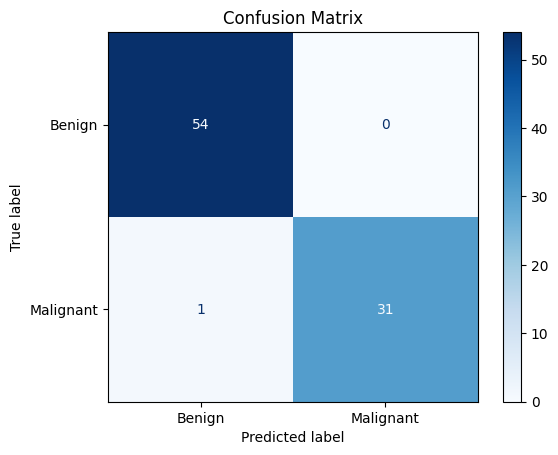

False Positives: 0
False Negatives: 1
Sample False Positives:
 Empty DataFrame
Columns: [True, Predicted, Prob]
Index: []
Sample False Negatives:
     True  Predicted      Prob
40   1.0          0  0.277417


In [18]:
#Error Analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def error_analysis(model, loader):
    model.eval()
    y_true, y_pred_probs, y_preds = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch).cpu().numpy()
            y_pred_probs.extend(outputs.flatten())
            y_preds.extend((outputs.flatten() > 0.5).astype(int))
            y_true.extend(y_batch.numpy())

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Check false positives and false negatives
    errors = pd.DataFrame({
        "True": y_true,
        "Predicted": y_preds,
        "Prob": y_pred_probs
    })

    false_positives = errors[(errors["True"] == 0) & (errors["Predicted"] == 1)]
    false_negatives = errors[(errors["True"] == 1) & (errors["Predicted"] == 0)]

    print(f"False Positives: {len(false_positives)}")
    print(f"False Negatives: {len(false_negatives)}")
    print("Sample False Positives:\n", false_positives.head())
    print("Sample False Negatives:\n", false_negatives.head())

error_analysis(best_model, test_loader)
